## Loading Library

In [118]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates

!pip install mlxtend==0.23.1

# **A Day in the Life of a Data Analyst: Unraveling Insights from The Bread Basket Dataset**

---

**Thursday, December 5, 2024** <br>
As the sun rises on another busy Thursday, I settle into my workspace, ready to dive into The Bread Basket dataset. This dataset is a treasure trove of information, capturing the essence of customer transactions at a local bakery. My goal today is to uncover insights that can help the bakery optimize its offerings and enhance customer satisfaction.


## **Loading Dataset**
I start my day by loading the dataset into my Python environment. Yesterday, I got the dataset from my [Client](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv). Using Pandas, I import the data and take a moment to familiarize myself with its structure.

In [119]:
#1
url = "https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv"
df = pd.read_csv(url)
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


As I glance through the initial rows, I see the columns: Transaction, Item, date_time, period_day, and weekday_weekend. Each transaction is unique, and I can already sense the potential insights hidden within.

## **Exploratory Data Analysis (EDA)**
With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.
### **Data Overview**
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [120]:
#2 info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [121]:
#3 check missing values
df.isnull().sum()

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

4. The overview reveals a _________________________. (fill that blank on the section below)

### **Transaction Trends**
Next, I analyze transaction trends over time. I extract the date and hour from the date_time column to see how customer purchases vary throughout the day and week. Then, I visualize the daily transaction trends to identify peak days and times for customer activity.

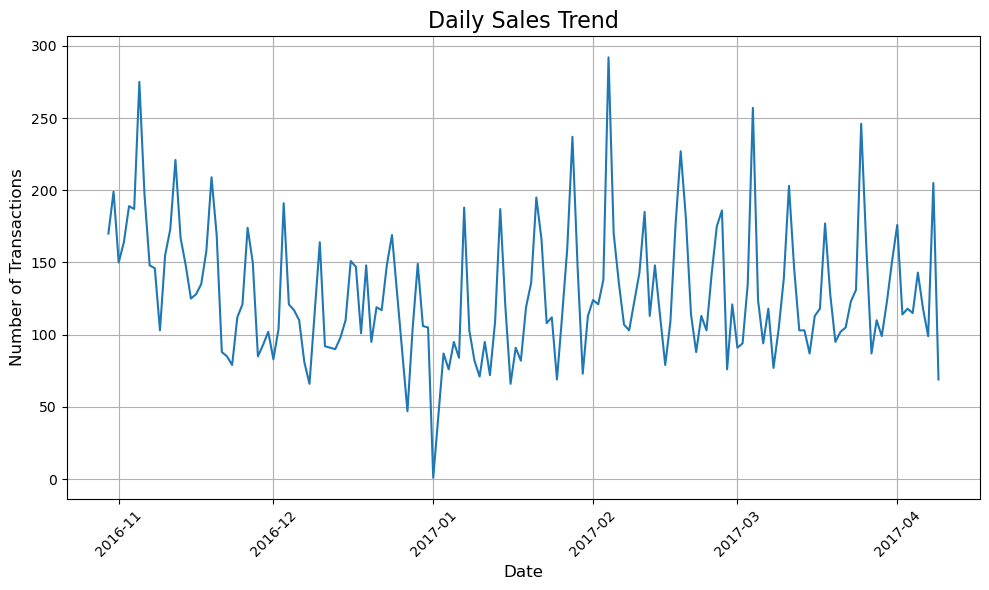

In [122]:
# Convert the 'date_time' column to datetime format
df['date'] = pd.to_datetime(df['date_time'], format="%d-%m-%Y %H:%M")

# #xtract the date and hour into separate columns
# df['date'] = df['date_time'].dt.date
# df['hour'] = df['date_time'].dt.hour

# Group by date and count the number of transactions
daily_transaction = df.groupby(df['date'].dt.date)['Transaction'].count()

plt.figure(figsize=(10, 6))
daily_transaction.plot()
plt.title('Daily Sales Trend', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45, fontsize=10)  # Rotate and adjust the date labels
plt.tight_layout()
plt.show()


Oh my God, it's so difficult to get insights from this visualization, but it seems like there might be a trend to uncover. Let me try separating it by the perspective of hour, time, day, day_name, month, and year by adding each of those variabels into the dataframe.

In [123]:
# 6
# Ensure the date_time column is in datetime format
df['date_time'] = pd.to_datetime(df['date_time'], format="%d-%m-%Y %H:%M")

# Extract additional time-based features
df['hour'] = df['date_time'].dt.hour           # Hour of the day (0-23)
df['day'] = df['date_time'].dt.day             # Day of the month (1-31)
df['day_name'] = df['date_time'].dt.day_name() # Day of the week (e.g., Monday)
df['month'] = df['date_time'].dt.month         # Month (1-12)
df['year'] = df['date_time'].dt.year           # Year (e.g., 2016)

# Check the updated DataFrame
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,date,hour,day,day_name,month,year
0,1,Bread,2016-10-30 09:58:00,morning,weekend,2016-10-30 09:58:00,9,30,Sunday,10,2016
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30 10:05:00,10,30,Sunday,10,2016
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30 10:05:00,10,30,Sunday,10,2016
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,2016-10-30 10:07:00,10,30,Sunday,10,2016
4,3,Jam,2016-10-30 10:07:00,morning,weekend,2016-10-30 10:07:00,10,30,Sunday,10,2016



Alright, now I can easily create a visualization of monthly sales.

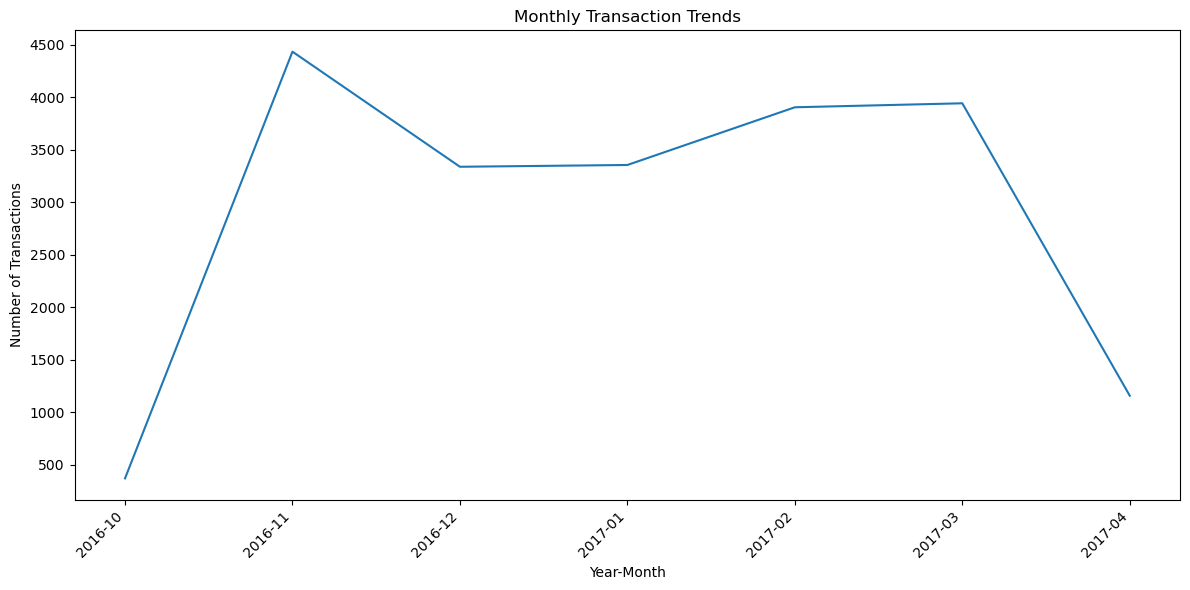

In [125]:
# 7
# Create a 'Year-Month' column
df['Year_Month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)

# Group by 'Year-Month' and count transactions
monthly_transactions = df.groupby('Year_Month')['Transaction'].count().reset_index()

# Plotting the monthly transaction trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_transactions['Year_Month'], monthly_transactions['Transaction'])
plt.xlabel('Year-Month')
plt.ylabel('Number of Transactions')
plt.title('Monthly Transaction Trends')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

8. Now, the visualization above provides better insights: The visualization illustrates the monthly transaction patterns, with a significant increase in November 2016, which could be attributed to promotions or holiday shopping. There was a dip in December, followed by a stable period from January to March 2017. A noticeable drop took place in April 2017, potentially due to seasonal factors or a decrease in demand, highlighting how customer behavior is influenced by seasonal changes and promotional events..

Next, I want to see if there's a trend for each day of the week in each month.
Oh, the dataframe has a column called weekday_weekend. What days include weekends and weekdays??

In [126]:
df

,Transaction,Item,date_time,period_day,weekday_weekend,date,hour,day,day_name,month,year,Year_Month
0,1,Bread,2016-10-30 09:58:00,morning,weekend,2016-10-30 09:58:00,9,30,Sunday,10,2016,2016-10
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30 10:05:00,10,30,Sunday,10,2016,2016-10
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30 10:05:00,10,30,Sunday,10,2016,2016-10
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,2016-10-30 10:07:00,10,30,Sunday,10,2016,2016-10
4,3,Jam,2016-10-30 10:07:00,morning,weekend,2016-10-30 10:07:00,10,30,Sunday,10,2016,2016-10
...,...,...,...,...,...,...,...,...,...,...,...,...
20502,9682,Coffee,2017-04-09 14:32:00,afternoon,weekend,2017-04-09 14:32:00,14,9,Sunday,4,2017,2017-04
20503,9682,Tea,2017-04-09 14:32:00,afternoon,weekend,2017-04-09 14:32:00,14,9,Sunday,4,2017,2017-04
20504,9683,Coffee,2017-04-09 14:57:00,afternoon,weekend,2017-04-09 14:57:00,14,9,Sunday,4,2017,2017-04
20505,9683,Pastry,2017-04-09 14:57:00,afternoon,weekend,2017-04-09 14:57:00,14,9,Sunday,4,2017,2017-04


In [127]:
# Ensure date_time column is datetime format
df['date_time'] = pd.to_datetime(df['date_time'], format="%d-%m-%Y %H:%M")

# Create a new column for day of the week
df['day_of_week'] = df['date_time'].dt.day_name()

# Classify weekdays and weekends
df['weekday_weekend'] = df['day_of_week'].apply(lambda x: 'Weekday' if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 'Weekend')

# Display unique values in the 'weekday_weekend' column
print("Unique weekday names:", df[df['weekday_weekend'] == 'Weekday']['day_of_week'].unique())
print("Unique weekend names:", df[df['weekday_weekend'] == 'Weekend']['day_of_week'].unique())

Unique weekday names: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Unique weekend names: ['Sunday' 'Saturday']



Oh, okay, now I know that "weekend" refers to Sunday and Saturday. Alright, moving on, before creating the visualization, it seems necessary to create an aggregation with the columns for the month and day name, where the values represent the total transactions that occurred.

In [128]:
#10

# Group by 'month' and 'day_name' and count the transactions
aggregated_data = df.groupby(['month', 'day_name'])['Transaction'].count().reset_index()

# Pivot the data to get the day names as columns
pivot_data = aggregated_data.pivot_table(index='month', columns='day_name', values='Transaction', aggfunc='sum')

# Fill NaN values with 0 (in case some day names are missing for certain months)
pivot_data = pivot_data.fillna(0)

# Display the result
print(pivot_data)


day_name  Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
month                                                                   
1          489.0   329.0     807.0   536.0     399.0    474.0      322.0
2          599.0   474.0     879.0   650.0     456.0    429.0      419.0
3          674.0   379.0     883.0   559.0     557.0    433.0      459.0
4           99.0   118.0     381.0   183.0     118.0    115.0      143.0
10           0.0   199.0       0.0   170.0       0.0      0.0        0.0
11         639.0   469.0     879.0   683.0     591.0    599.0      576.0
12         624.0   356.0     776.0   314.0     525.0    342.0      402.0


11. Wow, it turns out the insight that can be gained from the table above is weekends, particularly Saturdays, consistently experience higher activity, marking them as peak days, with Sundays also performing well in certain months. Weekday activity varies, with increased transactions on Tuesdays and Fridays during months like January and November. There is clear seasonality, with higher activity in March and November, while April sees a significant decline. October mostly has missing data, except for Sundays, indicating potential data inconsistencies. Overall, these trends highlight the weekend surge, which can be valuable for optimizing scheduling and resource allocation during peak periods.


It seems ready to create the visualization now. Okay, I will create a comparison visualization of total sales per day for each month.

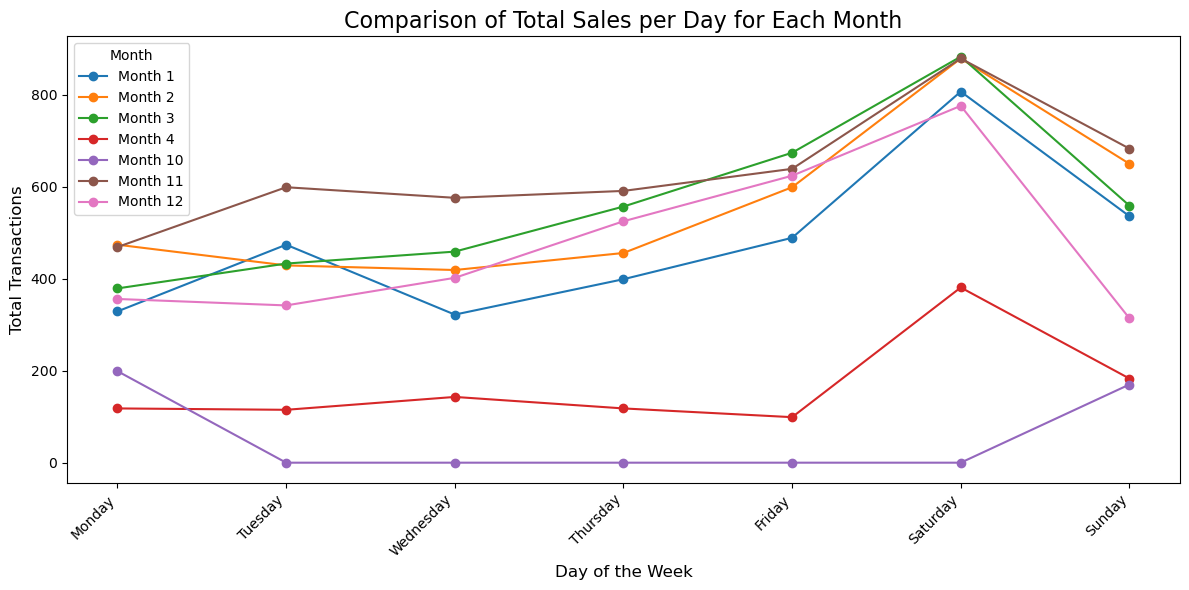

In [129]:
# 12

# Assuming pivot_data is your DataFrame from the previous step
# Ensure the days are ordered from Monday to Sunday
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reorder the columns to match the correct day sequence
pivot_data = pivot_data[days_of_week]

# Plotting the comparison of total sales per day for each month
plt.figure(figsize=(12, 6))

# Plot each month as a separate line on the graph
for month in pivot_data.index:
    plt.plot(pivot_data.columns, pivot_data.loc[month], marker='o', label=f'Month {month}')

# Adding labels and title
plt.title('Comparison of Total Sales per Day for Each Month', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Transactions', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Month', loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

13. After visualizing the data, I can now gain a clearer understanding of the sales trends. The visualization reveals that Saturdays are generally the busiest day, with Sundays also showing high sales in certain months. Weekday sales vary, with some months (like November) displaying consistent trends, while others (like April) show a decline, possibly due to reduced activity or other influencing factors. October’s data reveals minimal or no weekday activity, with a notable Sunday spike, which might indicate data gaps or unique patterns. In summary, weekends, particularly Saturdays, are crucial for sales, offering valuable insights for optimizing resource allocation, marketing efforts, and promotional strategies..

Oh, it turns out there's also a "period_day" column in the dataframe, but at the beginning, I only noticed "morning." Hmm, I'm curious, what other unique values could there be?

In [130]:
# 14

# Check the unique values in the 'period_day' column
unique_periods = df['period_day'].unique()

# Display the unique values
print(unique_periods)


['morning' 'afternoon' 'evening' 'night']


Oh, okay, there are "morning," "afternoon," "evening," and "night."
But, but, but, what are the time ranges for morning, afternoon, evening, and night? Let me try to find out.

In [131]:
# 15
# Dictionary to store the results
period_hours = {}

# Loop through each unique period and find the unique hours
for period in df['period_day'].unique():
    unique_hours = df.loc[df['period_day'] == period, 'hour'].unique()
    unique_hours.sort()  # Sort the hours for better readability
    period_hours[period] = unique_hours

# Display the results in the desired format
for period, hours in period_hours.items():
    print(f"Unique {period}_hour: {list(hours)}")

Unique morning_hour: [1, 7, 8, 9, 10, 11]
Unique afternoon_hour: [12, 13, 14, 15, 16]
Unique evening_hour: [17, 18, 19, 20]
Unique night_hour: [21, 22, 23]


16. Yes, I noticed those inconsistencies too. The issues you've highlighted are indeed odd:

    1. **Morning hours**: Including 1 AM in the "morning" category is unusual because 1 AM is generally considered part of the night rather than the morning. Typically, morning hours are considered to start around 5 or 6 AM.

    2. **Order of hours**: The hours not being listed in chronological order can lead to confusion, especially when trying to interpret trends or patterns. It's important for clarity that hours be arranged from early to late (e.g., 1 AM to 12 AM).

    3. **Inconsistent groupings**: The assignment of certain hours to periods that don't align with standard definitions creates ambiguity. For example, placing 1 AM in the "morning" period instead of "night" disrupts the natural flow of time periods.

Reorganizing the periods to adhere to common conventions would help. For example, defining the morning period as [5, 6, 7, 8, 9, 10, 11] and the night period to include hours like 1 AM would provide consistency and clarity. This approach will ensure that the data is grouped more logically and make it easier to derive insights.


But that's okay, I'll just continue exploring the insights. It seems like I can create a sales analysis based on the hours of each day here.

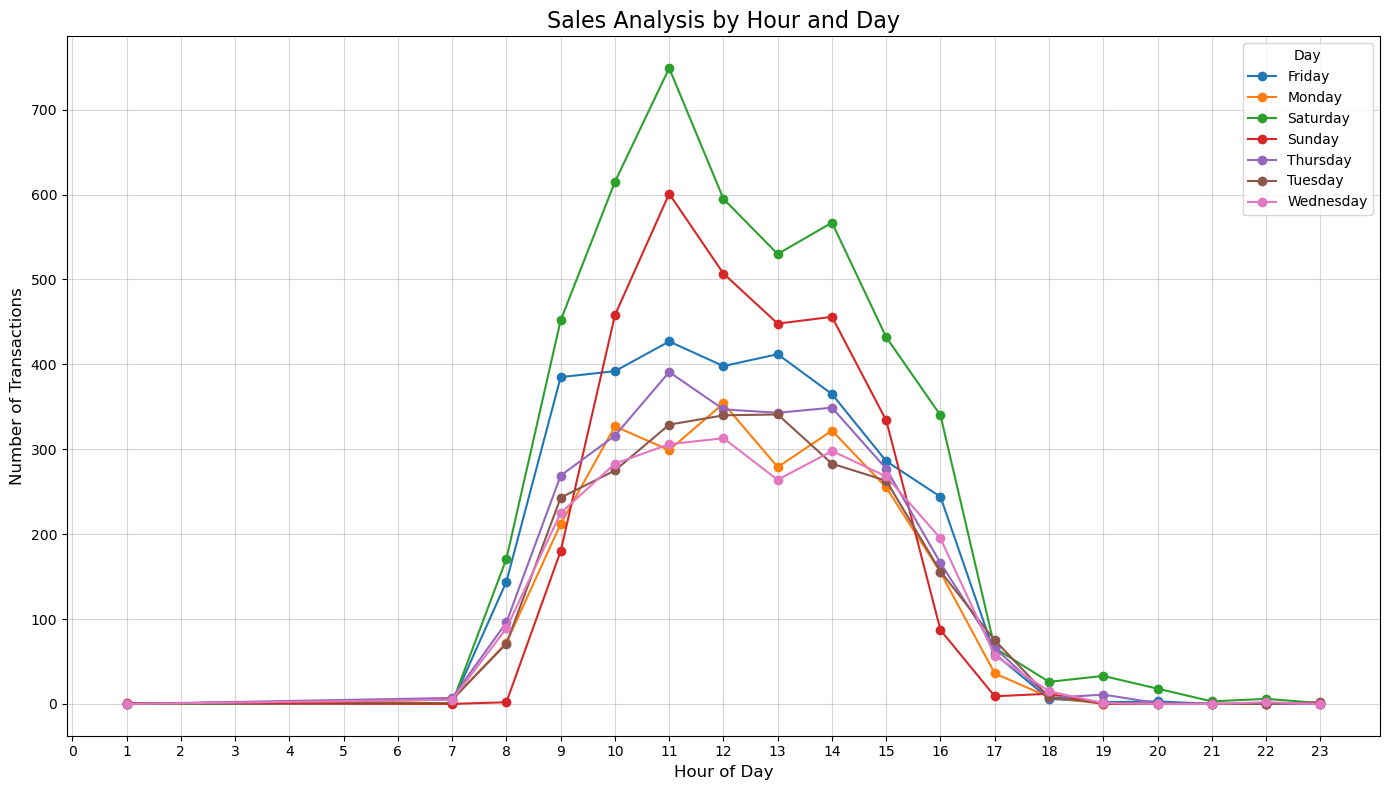

In [132]:
# 17
# Line plot to visualize hourly sales by day
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

# Plot each day as a separate line
for day in sales_pivot.columns:
    plt.plot(sales_pivot.index, sales_pivot[day], marker='o', label=day)

# Add labels, title, and legend
plt.title('Sales Analysis by Hour and Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(range(24))  # Ensure all hours are displayed
plt.legend(title='Day', loc='upper right')
plt.grid(alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

18. The daily sales trend plot highlights a clear and consistent pattern: transactions start increasing in the early morning (around 8 AM), peak between 10 AM and 2 PM, and gradually decline after 4 PM. Saturdays stand out with the highest peak, making it the busiest day, followed by Sundays and Fridays. Midweek days like Tuesday and Wednesday show more moderate sales. This trend emphasizes the importance of strategically allocating resources during peak hours, particularly on weekends, to maximize efficiency and meet customer demand.

### **Item Popularity**
Curious about which items are most popular, I analyze the frequency of orders for each item.

In [133]:
# Count the frequency of each item
item_counts = df['Item'].value_counts()

# Convert to a DataFrame for better readability
item_counts_df = item_counts.reset_index()
item_counts_df.columns = ['Item', 'Frequency']

# Display the top 10 most popular items
print(item_counts_df.head(10))

            Item  Frequency
0         Coffee       5471
1          Bread       3325
2            Tea       1435
3           Cake       1025
4         Pastry        856
5       Sandwich        771
6      Medialuna        616
7  Hot chocolate        590
8        Cookies        540
9        Brownie        379


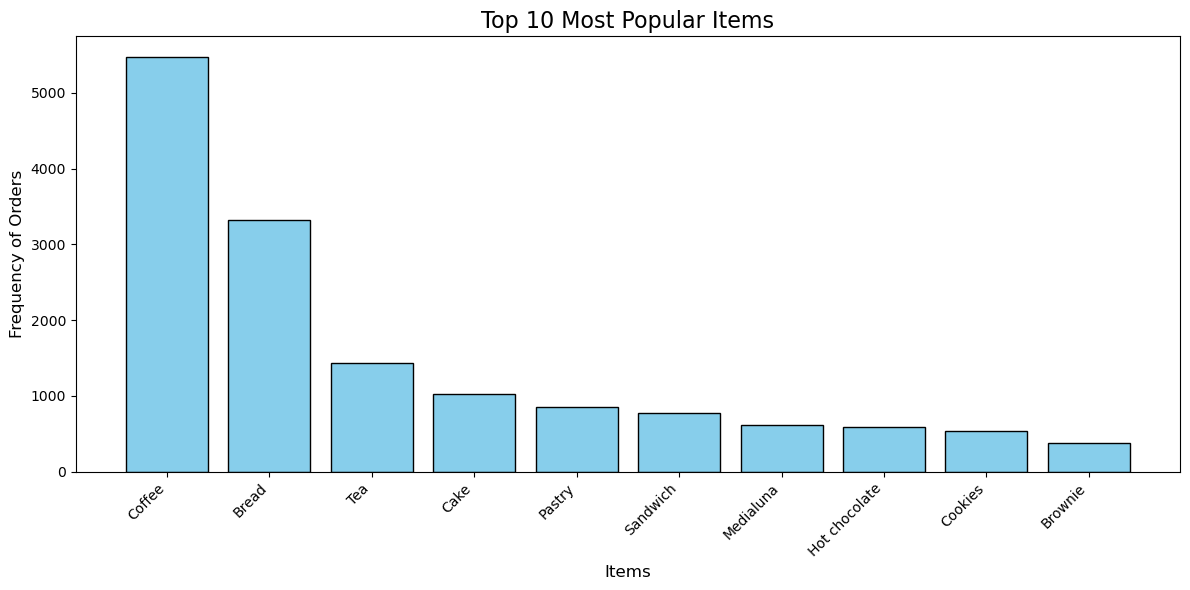

In [134]:
#19
# Assume `top_items` contains the data for the top 10 items
items = top_items['Item']
frequencies = top_items['Frequency']

plt.figure(figsize=(12, 6))
plt.bar(items, frequencies, color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Top 10 Most Popular Items', fontsize=16)
plt.xlabel('Items', fontsize=12)
plt.ylabel('Frequency of Orders', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Display the chart
plt.tight_layout()
plt.show()

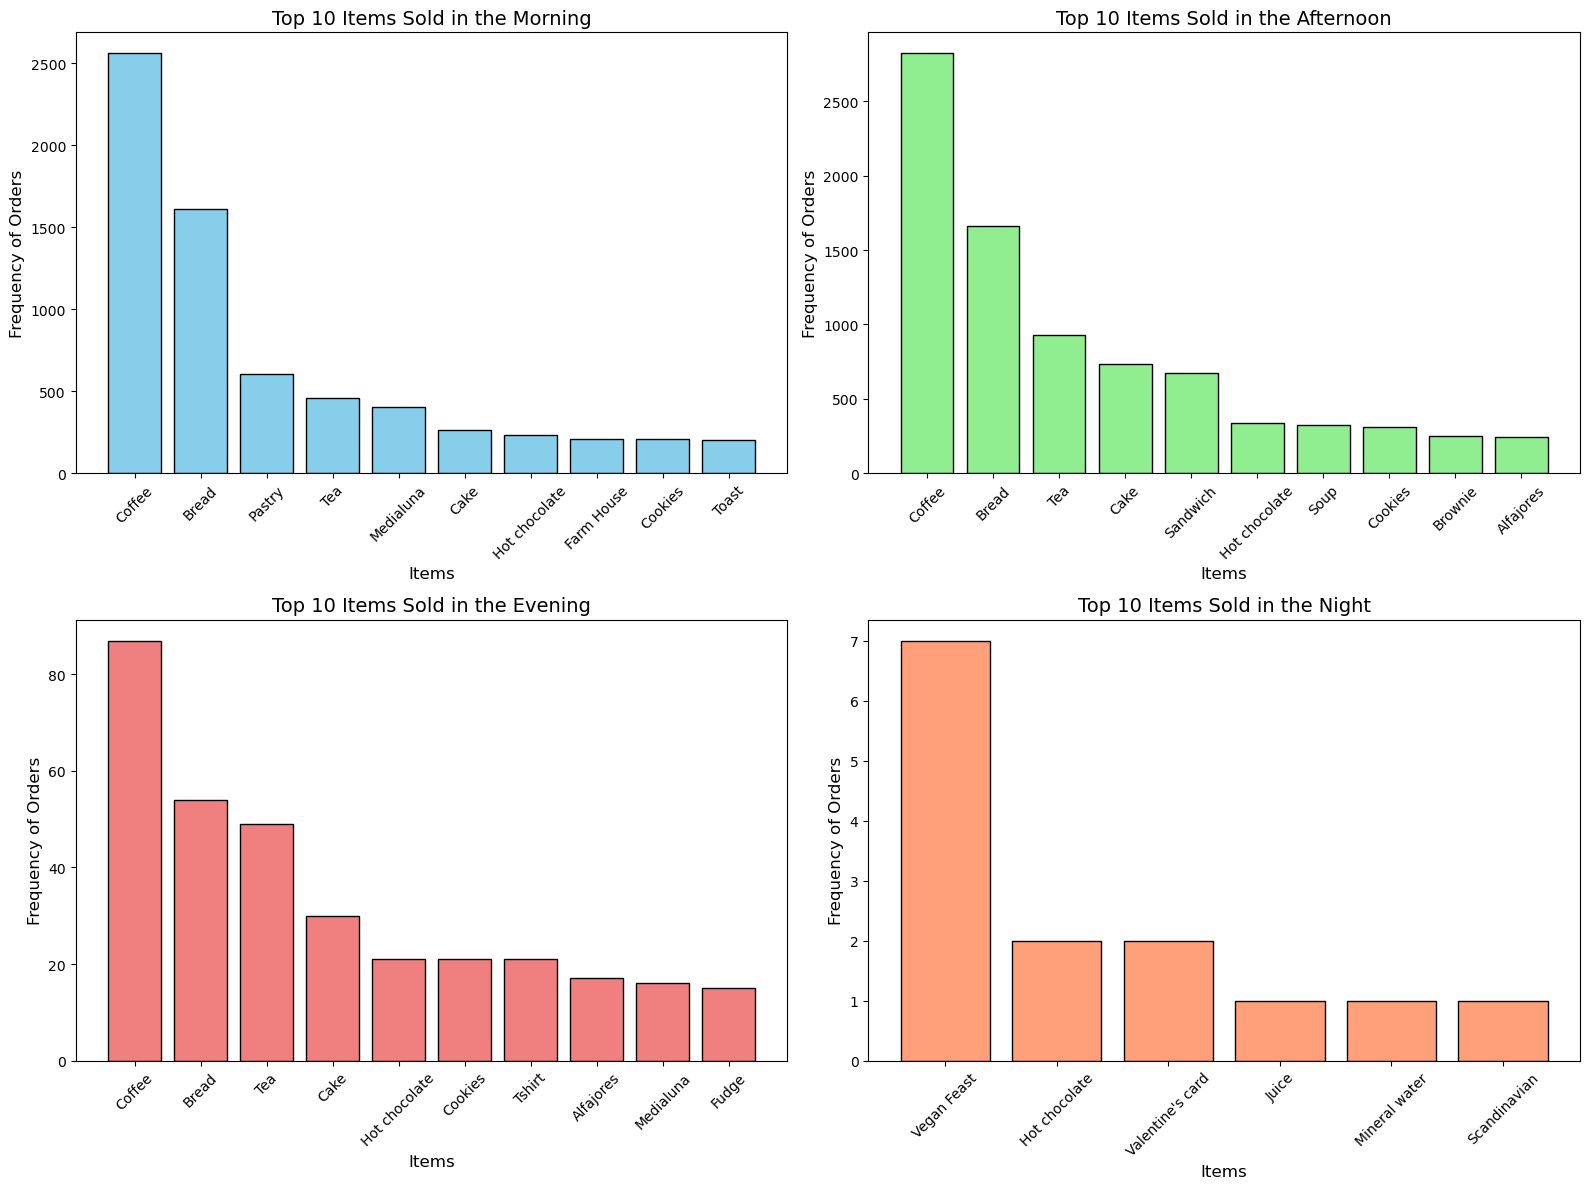

In [135]:
#21
# Filter the data for different periods of the day
morning_data = df[df['period_day'] == 'morning']
afternoon_data = df[df['period_day'] == 'afternoon']
evening_data = df[df['period_day'] == 'evening']
night_data = df[df['period_day'] == 'night']

# Count the frequency of items sold in each period and get the top 10
morning_item_counts = morning_data['Item'].value_counts().head(10)
afternoon_item_counts = afternoon_data['Item'].value_counts().head(10)
evening_item_counts = evening_data['Item'].value_counts().head(10)
night_item_counts = night_data['Item'].value_counts().head(10)

# Set up subplots to create separate charts
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Morning Chart
axes[0, 0].bar(morning_item_counts.index, morning_item_counts.values, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Top 10 Items Sold in the Morning', fontsize=14)
axes[0, 0].set_xlabel('Items', fontsize=12)
axes[0, 0].set_ylabel('Frequency of Orders', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)

# Afternoon Chart
axes[0, 1].bar(afternoon_item_counts.index, afternoon_item_counts.values, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Top 10 Items Sold in the Afternoon', fontsize=14)
axes[0, 1].set_xlabel('Items', fontsize=12)
axes[0, 1].set_ylabel('Frequency of Orders', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)

# Evening Chart
axes[1, 0].bar(evening_item_counts.index, evening_item_counts.values, color='lightcoral', edgecolor='black')
axes[1, 0].set_title('Top 10 Items Sold in the Evening', fontsize=14)
axes[1, 0].set_xlabel('Items', fontsize=12)
axes[1, 0].set_ylabel('Frequency of Orders', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)

# Night Chart
axes[1, 1].bar(night_item_counts.index, night_item_counts.values, color='lightsalmon', edgecolor='black')
axes[1, 1].set_title('Top 10 Items Sold in the Night', fontsize=14)
axes[1, 1].set_xlabel('Items', fontsize=12)
axes[1, 1].set_ylabel('Frequency of Orders', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

21. It seems you've identified an insightful shift in consumer behavior throughout the day. The plot reveals distinct trends in item popularity at different times:

    1. **Morning**: Coffee and breakfast items take the lead, aligning with people's daily routines as they start their day.
    2. **Afternoon**: There's an increase in demand for snacks and beverages, likely reflecting the mid-day energy slump or work break.
    3. **Evening**: Dinner-related items or hearty snacks become more popular, as people unwind after work.
    4. **Night**: Comfort food and late-night snacks dominate, catering to those relaxing or looking for a late-night treat.

Recognizing these patterns can greatly help businesses by allowing them to optimize marketing, plan promotions, and manage inventory to align with peak demand periods. This strategic approach helps reduce inefficiencies during slower times and ensures that resources are allocated effectively throughout the day.


I found a valentine card, I was curious about when people bought it so I made a visualization of it

C:\Users\willi\AppData\Local\Temp\ipykernel_41876\2210100365.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valentine_sales['date'] = valentine_sales['date_time'].dt.date  # Extract date part from 'date_time'


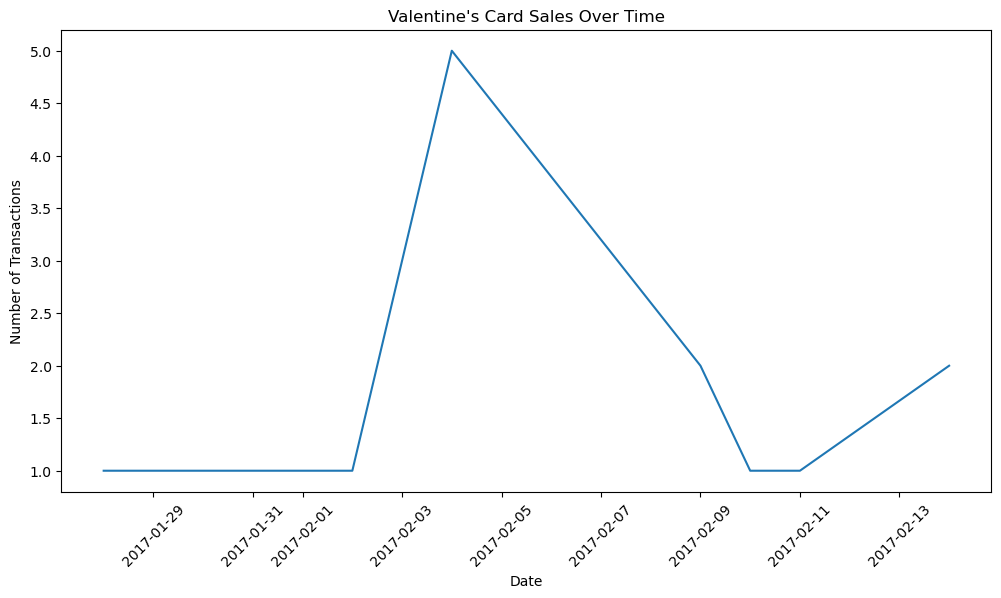

In [136]:
#22
# Assuming df is your DataFrame
# Step 1: Filter for Valentine's card transactions
valentine_sales = df[df['Item'] == "Valentine's card"]

# Step 2: Group by the 'date' column and count the number of transactions
valentine_sales['date'] = valentine_sales['date_time'].dt.date  # Extract date part from 'date_time'
daily_sales_valentine = valentine_sales.groupby('date').size().reset_index(name='transactions')

# Step 3: Convert 'date' column to datetime object
daily_sales_valentine['date'] = pd.to_datetime(daily_sales_valentine['date'])

# Step 4: Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(daily_sales_valentine['date'], daily_sales_valentine['transactions'])
plt.title("Valentine's Card Sales Over Time")
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

In [137]:
df

,Transaction,Item,date_time,period_day,weekday_weekend,date,hour,day,day_name,month,year,Year_Month,day_of_week
0,1,Bread,2016-10-30 09:58:00,morning,Weekend,2016-10-30 09:58:00,9,30,Sunday,10,2016,2016-10,Sunday
1,2,Scandinavian,2016-10-30 10:05:00,morning,Weekend,2016-10-30 10:05:00,10,30,Sunday,10,2016,2016-10,Sunday
2,2,Scandinavian,2016-10-30 10:05:00,morning,Weekend,2016-10-30 10:05:00,10,30,Sunday,10,2016,2016-10,Sunday
3,3,Hot chocolate,2016-10-30 10:07:00,morning,Weekend,2016-10-30 10:07:00,10,30,Sunday,10,2016,2016-10,Sunday
4,3,Jam,2016-10-30 10:07:00,morning,Weekend,2016-10-30 10:07:00,10,30,Sunday,10,2016,2016-10,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20502,9682,Coffee,2017-04-09 14:32:00,afternoon,Weekend,2017-04-09 14:32:00,14,9,Sunday,4,2017,2017-04,Sunday
20503,9682,Tea,2017-04-09 14:32:00,afternoon,Weekend,2017-04-09 14:32:00,14,9,Sunday,4,2017,2017-04,Sunday
20504,9683,Coffee,2017-04-09 14:57:00,afternoon,Weekend,2017-04-09 14:57:00,14,9,Sunday,4,2017,2017-04,Sunday
20505,9683,Pastry,2017-04-09 14:57:00,afternoon,Weekend,2017-04-09 14:57:00,14,9,Sunday,4,2017,2017-04,Sunday


23. The insight from the Valentine's card sales data reveals a clear pattern: sales remain low from late January to early February, then experience a sharp spike around February 2nd, peaking on February 5th with over 5 cards sold. After this peak, sales decline, reaching a low on February 10th-11th, but then show a slight rise just before Valentine's Day, suggesting last-minute purchases. The highest demand occurs about 10 days before Valentine's Day, highlighting a critical sales window for businesses to target promotional efforts and inventory management.


## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [138]:
# 24
# Group data by 'Transaction' and 'Item' and sum quantities
df['Quantity'] = df.groupby(['Transaction', 'Item'])['Item'].transform('count')

# Drop duplicate rows to keep only one entry for each item per transaction
df = df.drop_duplicates(subset=['Transaction', 'Item'])

# Create a pivot table to represent transactions
transaction_data = df.pivot_table(index='Transaction', columns='Item', values='Quantity', aggfunc='sum').fillna(0)

# Display the first few rows of the transaction data
display(transaction_data.head())

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
#25

# Convert quantities to 1 and 0
transaction_data = transaction_data.applymap(lambda x: 1 if x > 0 else 0)

# Display the first few rows of the transaction data
display(transaction_data.head())

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. (min_support=0.02, metric="lift", min_threshold=1)

In [140]:
# 26
# Apply Apriori algorithm
frequent_itemsets = apriori(transaction_data, min_support=0.02, use_colnames=True)

# Create a DataFrame with 'support' and 'itemsets' columns
frequent_itemsets_df = frequent_itemsets[['support', 'itemsets']]

# Display the DataFrame
display(frequent_itemsets_df)

C:\Users\willi\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)
5,0.054411,(Cookies)
6,0.039197,(Farm House)
7,0.058320,(Hot chocolate)
8,0.038563,(Juice)
9,0.061807,(Medialuna)


In [141]:
# 27
# Apply Apriori algorithm
frequent_itemsets = apriori(transaction_data, min_support=0.02, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the association rules
display(rules)

C:\Users\willi\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
1,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306,0.050231
2,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
3,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
4,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
5,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556
6,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
7,(Coffee),(Cookies),0.478394,0.054411,0.028209,0.058966,1.083723,0.002179,1.004841,0.148110
8,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403
9,(Coffee),(Hot chocolate),0.478394,0.058320,0.029583,0.061837,1.060311,0.001683,1.003749,0.109048


## Conclusion: The Impact of Data Analysis
28 As my day of analysis concludes, I have compiled key insights from The Bread Basket dataset into a comprehensive report:

1. **Transaction Trends**: The bakery experiences peak sales on weekends, particularly between 10 AM and 12 PM, suggesting customers visit for mid-morning snacks or to purchase bread for meals. Sales also increase toward the end of the year, likely due to holiday demand.

2. **Popular Items**: Coffee, Bread, and Tea are consistently favored throughout the day. In the afternoon, there's a noticeable rise in the sales of Cookies, Hot Chocolate, and Cakes, reflecting a preference for afternoon treats. Additionally, Valentine's cards experience a surge in sales around February 14th, in line with seasonal demand.

3. **Apriori Algorithm Insights**: The Apriori algorithm reveals frequent item pairings, such as Coffee with Toast, Medialuna, Pastry, and Cake. These insights can be leveraged to create promotional bundles, encouraging customers to purchase complementary items together.

4. **Operational Recommendations**: To optimize operations, the bakery can adjust staffing and inventory to meet peak-hour and weekend demands. Bundled promotions for popular combinations like Coffee and Toast can drive additional sales. It’s also crucial to maintain a steady supply of core products like Coffee, Bread, and Tea. Seasonal opportunities, such as Valentine’s Day, present potential for targeted marketing efforts. Additionally, promoting afternoon treats like Cookies and Cakes can further increase midday sales.

By implementing these strategies, the bakery can enhance customer satisfaction and drive business growth.
